**Student Name:** Adam Abid, Devin Duran 

**Assignment Title:** Data Anaylsis Project 2 - Random Forest & K - Clustering


## <mark> Random Forests </mark>


   ### Predicting an Nba Draft prospects longevity in the league 

## <mark> Getting Started: </mark>
- The first thing we do is import all the necessary libraries
- All of the libraries we will use to help us in making our model for    prediction comes from sklearn
- We will also use the pandas library to help filter our data and clean it up for optimal use.


- In this specific example we are using the regression model of random forest because we want to know an amount related to certain factors and not just a yes or no to our question. We know our draft proscpect will be active in the NBA but for how long is the question.

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error



## <mark> Overview of Data: </mark>

- The dataset contains all NBA Draft picks from 1989-2021. Dataset consists of year, overall pick, college, statistics from their time in the nba and much more. Categorical data relating to college and the team that drafted them. Numerical data related to performance numbers from their time in the Nba. For example the minutes played, years active, and the amount of minutes they played in total.



- Here we are reading the data into the markdown and then printing the first 5 indexes to make sure that the data read was successful


- You can find the data set we used @ https://www.kaggle.com/datasets/mattop/nba-draft-basketball-player-data-19892021/code?resource=download


In [2]:
data = pd.read_csv("nbaplayersdraft.csv")
data.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


## <mark> Cleaning Data Frame: </mark>

- We will start out by creating a new data frame with the columns that are necessary 


- We will also use the **groupby() and ngroup()** function to assign a unique numerical id to the different colleges and drafted teams to help fit the data into the right parameters of the train_test_split() function


- You may notice that they are 31 ids for the teams eventhough they are currently only 30 teams in the NBA. This is because of the timeframe our data is from, and that includes the former expansion team the **Seattle Supersonics** who are no longer a part of the asscociation.

In [3]:
#create the new data frame with the columns we want 
new_df = data[['id','year', 'rank','overall_pick', 'team', 'player', 'college', 'years_active','games',
               'minutes_played']]

new_df_filtered = new_df
new_df_filtered['college_id'] = new_df_filtered.groupby(['college']).ngroup()
new_df_filtered['team_id'] = new_df_filtered.groupby(['team']).ngroup()


/var/folders/8p/dk6ky0qn7nd_kl4sym24mk940000gn/T/ipykernel_21282/759703936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['college_id'] = new_df_filtered.groupby(['college']).ngroup()
/var/folders/8p/dk6ky0qn7nd_kl4sym24mk940000gn/T/ipykernel_21282/759703936.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered['team_id'] = new_df_filtered.groupby(['team']).ngroup()


- We will also remove **ALL** rows with "NA" entries form the data frame and also reindex the columns for easier reading

In [4]:
#command for removing na entries
new_df_filtered = new_df_filtered.dropna()

#command to reindex the column in the dataframe
new_df_filtered= new_df_filtered.reindex(columns=['id','year', 'college_id', 'team_id','rank','overall_pick', 'team', 'player', 'college', 'years_active','games',
               'minutes_played'])
new_df_filtered.head()



,id,year,college_id,team_id,rank,overall_pick,team,player,college,years_active,games,minutes_played
0,1,1989,93,30,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0
1,2,1989,48,14,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0
2,3,1989,2,31,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0
3,4,1989,105,17,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0
4,5,1989,195,4,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0


## <mark>Creating and Training our Model: </mark>

- After cleaning our data and making our data frame suitable for the random forest functions, we can now begin training and testing our model.


- Firstly we will create and seperate our independent and dependent variables. 



- In this context our independent variables is the thing we our trying to predict and the dependent variables are the variables we will use to create our prediction. 




- For this specific model we have chosen to predict how many years a draft prospect will be active in the NBA (our independent variable) with our dependent variables being **rank, overall draft pick, the team they were drafted and the college they were from.**



- For context the **average** amount of years an NBA player is active is **6.3 years** as seen below

In [5]:
years_active_mean = new_df_filtered['years_active'].mean()
years_active_mean

6.308988764044944

In [6]:
#now we have to create the independent variables(y) and dependent variables (x)
mean = new_df_filtered['years_active'].mean()

x = new_df_filtered[['rank','college_id','team_id','overall_pick']]
y = new_df_filtered[['years_active']]



- Now we are going to train our data using the **train_test_split** function


- For our model we will be using **30%** of the dataset to train the model and the remaining **70%** to test the model.


- For our intial test we will be using **10 estimators** and see what our accuracy looks like if we should increase or decrease

In [7]:
#here is where we are going to train our model and we will use 30% of our data to train with 70% to test it on

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state=0)
h = RandomForestRegressor(n_estimators =10 , random_state = 1)

## <mark>Running our Model: </mark>

- We can now run the model with the **fit()** and testing it with the **predict()** funciton


- We can judge our model results with the **mean squared error** which tells us the average summation of the squared difference from the actual value and the predicted value.


- There is no correct **mse** value as it is a relative number to the data set however the lower the number the better and a mse of zero indicates a perfect model.


- In our **FIRST** test of the model we got an mse score of **21.8** which isnt bad but not great either

In [8]:
h.fit(x_train,y_train)
y_pred = h.predict(x_test)
mean_squared_error(y_test,y_pred)

/var/folders/8p/dk6ky0qn7nd_kl4sym24mk940000gn/T/ipykernel_21282/2430220004.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  h.fit(x_train,y_train)


21.798152394859812

- Below we will test our model by giving it the attributes of a new nba draft prospect 

- Giving him a rank of 1, a college id of 48, team id of 4 and an overall pick in the draft of 1. With this entered we see a predicted acitve stint in the NBA of 4.3 years which is below the average.

- Knowing that this player was drafted first overall and only last an approximate of 4 seasons in the NBA it makes you question the model.


In [9]:
observation = [[1,48,4,1]]
h.predict(observation)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.3])

- What if we ran another test with a rank of 1, overall pick of 1, a college id of 195 representing UNC Tar Heels, and a team Id of 17 representing the Miami Heat.


In [10]:
observation = [[1,195,17,1]]
h.predict(observation)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.3])

- **WHAT A DIFFERENCE** Our draft prospect went to a much better team and came from a relativley similar basketball school in terms of pedigree and had a predicted active rate of 13.3 seasons in the NBA

- We can also see the most important factors that has a definitive effect on how long a draft prospect will play in the league. 



- We can see that all of the factors are similarliy even except for the **overall pick** which to frequent NBA fans could come as a surprise.

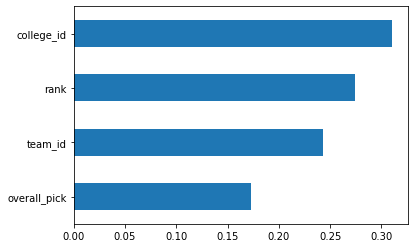

In [11]:
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

## <mark>Improving  our Model: </mark>

- Now that we have a benchmark standard we can now work on impoving the accuracy of our model.


- The first thing we want to do is bring down the mse score. A way we can do this is increase the amount of estimators we have. With such a big time frame and multiple factors it would make sense to increase the amount of samples for the model to look at.


- We will change the number of estimators until we see a **diminish of returns**



In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state=0)
h = RandomForestRegressor(n_estimators =30 , random_state = 1)

- We can see below if we increase the **estimators** from 10 to 30 it lowers our mse score from 21.8 to 20 which is great, but what if we went higher.

In [13]:
h.fit(x_train,y_train)
y_pred = h.predict(x_test)
mean_squared_error(y_test,y_pred)

/var/folders/8p/dk6ky0qn7nd_kl4sym24mk940000gn/T/ipykernel_21282/2430220004.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  h.fit(x_train,y_train)


20.046043592794504

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state=0)
h = RandomForestRegressor(n_estimators =100 , random_state = 1)

- We can now see the dimeenishing return take effect as we increased the amount of estimators by three times and only decreased our mse score by .1 to 19.9 

In [15]:
h.fit(x_train,y_train)
y_pred = h.predict(x_test)
mean_squared_error(y_test,y_pred)

/var/folders/8p/dk6ky0qn7nd_kl4sym24mk940000gn/T/ipykernel_21282/2430220004.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  h.fit(x_train,y_train)


19.900302266030632

### <mark>Retesting our model: </mark>

- Lets retest our model with the increased estimators


In [16]:
observation = [[1,48,4,1]]
h.predict(observation)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.01])

- We can now see with the same Nba prospect we predicited with before his longevity in the NBA has **increased a full season** with the new model.

- What about our second prospect from UNC**??**




In [17]:
observation = [[1,195,17,1]]
h.predict(observation)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11.19])

- Wow where as the new model **increased the predicted active rate** of our first prospect, it has **decreased our second prospect** predicted active rate by a full 2 seasons



- Lets look at our important factors and see if they have changed any from before

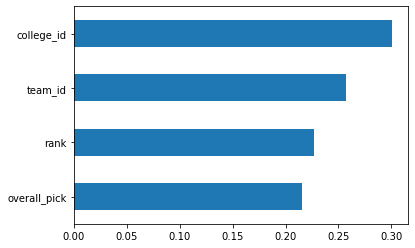

In [18]:
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

- We can see that the college factor stayed relativly the same but the new model is more affected by the team that a player gets drafted by more than their rank and overall pick selection which is highly surprising to me as someone who is an avid fan who thinks the overall pick of a player has the biggest factor. 



- What if we can improve our model by removing the bottom two factor

### <mark>Model V3: </mark>



- One last thing we want to do is create a model based on the two most important factors - college and team ids. 


In [19]:
x = new_df_filtered[['college_id','team_id']]
y = new_df_filtered[['years_active']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state=0)
h = RandomForestRegressor(n_estimators =100 , random_state = 1)

In [20]:
h.fit(x_train,y_train)
y_pred = h.predict(x_test)
mean_squared_error(y_test,y_pred)

/var/folders/8p/dk6ky0qn7nd_kl4sym24mk940000gn/T/ipykernel_21282/2430220004.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  h.fit(x_train,y_train)


27.950155201785986

- This is interesting because we now have the highest mse score out of all the models eventhough we have only the two most important factors

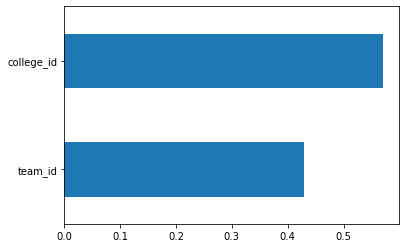

In [21]:
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

In [22]:
observation = [[4,48]]
h.predict(observation)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.63])

- V3 of the model gives the first prospect an increased season of activity in the NBA 
- which is much closer to the league average of 6.3 seasons.


- What about our second prospect??

In [23]:
observation = [[17,195]]
h.predict(observation)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.87])

- We see that model 3 has a similar result to the first prospect relating its prediction closer to the mean of the dataset.


## <mark>Conclusion: </mark>


- So far we have seen that with our data set the league average of a players activity in the NBA is an approximate 6.3 season. We created 3 modified versions of our regression model to predict the active seasons that an NBA draftee will play in his career. With the first model having an MSE score of 21.8 we acheived two results with one being much lower than the league average and one being more than double with an approximate 13.3 seasons. We concluded that although the model deemed the college id and rank as the most important factors, it was most affected by **the team the player was drafted by**. This makes sense since Miami Heat is much better team than the Charlotte Hornents. In our second model we increased the number of estimators from 10 to 100 as this was the point at which we saw **diminishing returns in the mse score**. Model 2 had an MSE score of 19.9 deeming it much more accurate than model 1. During testing of the model we saw that the two prospects had opposite results in terms of the length of their carreer. With prospect one gaining an entire season, and prospect 2 losing 2 seasons. **Model 2 has been the most realistic** to todays standard as it is true players who stay on bad teams tend to leave earlier than those on more dominant teams. Model 3 we let the predictions go off on the two most important factors from model 2. Team id and College id. With this we acheived an **MSE score of 27** being the least accurate out of all the models. It also gave our two prospects similar timespans in the NBA with both being around the league average of 6.3. We have deemed this the most inaccurate model of the three due to its **high MSE** score and lack of factors taken into to account for its prediction.


### <mark> Limitations and Future Improvements </mark>

- By applying Random Forests to this dataset we have come accross many limitations arising from the data set. While I do think the random forest regression model might not be the best algorithm for this prediction as it is much better suited at predicted names and certain yes no characteristics rather than values. The dataset used creates alot of problems. One is that it **limits the amount of factors** the model can use to make its predictions. In the future it would have been better to have the stats from their time in college and not their time in the NBA. This way we can take into account certain stats such as "minutes played", "3- point percentage" and "defensive rating" to make a better assessment on how dominant this prospect would be in the league. This is much better than making the prediction solely based on the college he went to or the team he was drafted by as the status and pedigree of those teams are constantly changing year to year.